# 量子测量

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.7.0rc1/resource/_static/logo_notebook.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.7.0rc1/mindquantum/zh_cn/beginner/mindspore_quantum_measurement.ipynb)&emsp;
[![下载样例代码](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.7.0rc1/resource/_static/logo_download_code.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.7.0rc1/mindquantum/zh_cn/beginner/mindspore_quantum_measurement.py)&emsp;
[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.7.0rc1/resource/_static/logo_source.svg)](https://gitee.com/mindspore/docs/blob/r2.7.0rc1/docs/mindquantum/docs/source_zh_cn/beginner/quantum_measurement.ipynb)

## 概述

在量子线路设计时，我们最终需要通过测量(measure)操作获得结果，进行测量的时候需要选定特定的基态进行测量，而测量得到的结果是不确定的，测量后量子态也会随机坍塌到我们测量的某个基态上。

量子测量由一组测量算子${M_m}$描述，这些算子作用在被测系统状态空间上，指标$m$表示实验中可能的测量结果，若在测量前，量子系统的状态为$|\psi⟩$，则结果$m$发生的可能性为：

$$
p(m)=⟨\psi|M^\dagger_mM_m|\psi⟩
$$

测量后系统的状态塌缩为：

$$
\frac{M_m|\psi⟩}{\sqrt{⟨\psi|M^\dagger_mM_m|\psi⟩}}
$$

测量算子满足完备性方程：

$$
\Sigma_mM^\dagger_mM_m=I
$$

完备性方程表达了概率之和为1的事实：

$$
1=\Sigma_m p(m)=\Sigma_m ⟨\psi|M^\dagger_mM_m|\psi⟩
$$

该方程对所有的$|\psi⟩$都成立，与完备性方程等价，但直接验证完备性方程更简单，所以将完备性方程作为约束条件。

根据选取测量算子的不同，我们常见的测量分成计算基测量、投影测量、Pauli测量等，MindSpore Quantum提供了丰富的测量功能与可视化展示工具，我们利用这些功能进一步学习量子测量。

## 计算基测量

我们先对计算基测量有一个简单认识：假设有一个n个量子比特的态，我们对它执行n比特计算基测量，测量后，如果结果为$00 \cdots0$，表明该n量子比特系统的量子状态已塌缩到$|00 \cdots0⟩$态；类似地，如果测量其中一个量子比特，那么它表示的$2^n$种情况就会被排除掉一半，即在两个各占一半的空间中，测量操作将量子态投影到其中一个空间，表明该n量子比特系统的量子状态中一个子系统塌缩了。

### 单量子比特在计算基下的测量

计算基测量算子：$M_0=|0⟩⟨0|$和$M_1=|1⟩⟨1|$，注意到每个测量算子都是Hermite的，即满足$M_0^\dagger=M_0,M_1^\dagger=M_1$，并且$M^2_0=M_0,M^2_1=M_1$，于是满足完备性关系：

$$
I=M^\dagger_0M_0+M^\dagger_1M_1=M_0+M_1
$$

假设被测量状态$|\psi⟩=a|0⟩+b|1⟩$，则获得测量结果0的概率是：

$$
\begin{align*}
p(0)&=⟨\psi|M^\dagger_0M_0|\psi⟩\\
&=⟨\psi|M_0|\psi⟩\\
&=⟨\psi|(|0⟩⟨0|)|\psi⟩\\
&=(⟨\psi|0⟩)(⟨0|\psi⟩)\\
&=[(⟨0|a^{\star}+⟨1|b^{\star})|0⟩][⟨0|(a|0⟩+b|1⟩)]\\
&=(a^{\star}⟨0|0⟩+b^{\star}⟨1|0⟩)(a⟨0|0⟩+b⟨1|0⟩)\\
&=a^{\star}a\\
&=|a|^2
\end{align*}
$$

类似地，获得测量结果1的概率是$p(1)=|b|^2$。两种情况下，测量后的状态分别为：

$$
\begin{align*}
\frac{M_0|\psi⟩}{|a|}=\frac{a}{|a|}|0⟩\\
\frac{M_1|\psi⟩}{|b|}=\frac{b}{|b|}|1⟩\\
\end{align*}
$$

### 多量子比特在计算基下的测量——以双量子比特为例

#### 测量系统中所有比特

双量子比特系统下计算基测量算子：$M_{00}=|00⟩⟨00|,M_{01}=|01⟩⟨01|,M_{10}=|10⟩⟨10|$和$M_{11}=|11⟩⟨11|$，注意到每个测量算子都是Hermite的，即满足$M_{ij}^\dagger=M_{ij},i,j\in\{0,1\}$，并且$M_{ij}^2=M_{ij}$，于是满足完备性关系：

$$
I=M^\dagger_{00}M_{00}+M^\dagger_{01}M_{01}+M^\dagger_{10}M_{10}+M^\dagger_{11}M_{11}=M_{00}+M_{01}+M_{10}+M_{11}
$$

假设被测量状态$|\psi⟩=a|00⟩+b|01⟩+c|10⟩+d|11⟩$，则获得测量结果00的概率是：

$$
\begin{align*}
p(00)&=⟨\psi|M^\dagger_{00}M_{00}|\psi⟩\\
&=⟨\psi|M_{00}|\psi⟩\\
&=⟨\psi|(|00⟩⟨00|)|\psi⟩\\
&=(⟨\psi|00⟩)(⟨00|\psi⟩)\\
&=[(⟨00|a^{\star}+⟨01|b^{\star}+⟨10|c^{\star}+⟨11|d^{\star})|00⟩][⟨00|(a|00⟩+b|01⟩+c|10⟩+d|11⟩)]\\
&=(a^{\star}⟨00|00⟩+b^{\star}⟨01|00⟩+c^{\star}⟨10|00⟩+d^{\star}⟨11|00⟩)(a⟨00|00⟩+b⟨00|01⟩+c⟨00|10⟩+b⟨00|11⟩)\\
&=a^{\star}a\\
&=|a|^2
\end{align*}
$$

类似地，获得测量结果01的概率是$p(01)=|b|^2$，10的概率是$p(10)=|c|^2$，11的概率是$p(11)=|d|^2$。四种情况下，测量后的状态分别为：

$$
\begin{align*}
\frac{M_{00}|\psi⟩}{|a|}=\frac{a}{|a|}|00⟩\\
\frac{M_{01}|\psi⟩}{|b|}=\frac{b}{|b|}|01⟩\\
\frac{M_{10}|\psi⟩}{|c|}=\frac{c}{|c|}|10⟩\\
\frac{M_{11}|\psi⟩}{|d|}=\frac{d}{|d|}|11⟩\\
\end{align*}
$$

#### 测量系统中单个比特

如果测量双量子比特量子状态的第一个量子比特，双计算基测量算子：$M_0=|0⟩⟨0|\otimes I$和$M_1=|1⟩⟨1|\otimes I$，注意到每个测量算子都是Hermite的，即满足$M_0^\dagger=M_0,M_1^\dagger=M_1$，并且$M^2_0=M_0,M^2_1=M_1$，于是满足完备性关系：

$$
I=M^\dagger_0M_0+M^\dagger_1M_1=M_0+M_1
$$

假设被测量状态$|\psi⟩=a|00⟩+b|01⟩+c|10⟩+d|11⟩$，则测量双量子比特量子状态的第一个量子比特，获得测量结果0的概率是：

$$
\begin{align*}
p(0)&=⟨\psi|M^\dagger_0M_0|\psi⟩\\
&=⟨\psi|M_0|\psi⟩\\
&=⟨\psi|(|0⟩⟨0|\otimes I)|\psi⟩\\
&=(⟨00|a^{\star}+⟨01|b^{\star}+⟨10|c^{\star}+⟨11|d^{\star})|(|0⟩⟨0|\otimes I)|(a|00⟩+b|01⟩+c|10⟩+d|11⟩)\\
&=(⟨00|a^{\star}+⟨01|b^{\star}+⟨10|c^{\star}+⟨11|d^{\star})|(a|00⟩+b|01⟩)\\
&=a^{\star}a+b^{\star}b\\
&=|a|^2+|b|^2
\end{align*}
$$

类似地，获得测量结果1的概率是$p(1)=|c|^2+|d|^2$。两种情况下，测量后的状态分别为：

$$
\begin{align*}
\frac{M_0|\psi⟩}{\sqrt{|a|^2+|b|^2}}=\frac{a}{\sqrt{|a|^2+|b|^2}}|00⟩+\frac{b}{\sqrt{|a|^2+|b|^2}}|01⟩\\
\frac{M_1|\psi⟩}{\sqrt{|c|^2+|d|^2}}=\frac{c}{\sqrt{|c|^2+|d|^2}}|10⟩+\frac{d}{\sqrt{|c|^2+|d|^2}}|11⟩\\
\end{align*}
$$

通过对计算基测量的学习，我们可以直观认识到，在多量子比特态的其中一个比特上做测量，本质是将量子态投影到两个子空间之一中。为了简洁的区分出这两个子空间，我们利用线性代数知识知道，可以通过恰好有两个唯一特征值的矩阵来描述两个正交子空间。

### 计算基测量的MindSpore Quantum实现

接下来我们使用MindSpore Quantum搭建一个含测量操作的量子线路并观察结果，首先导入本教程所依赖的模块。

In [1]:
import numpy as np                           # 导入numpy库并简写为np
from mindquantum.core.gates import X, H      # 导入量子门H, X
from mindquantum.simulator import Simulator  # 从mindquantum.simulator中导入Simulator类
from mindquantum.core.circuit import Circuit # 导入Circuit模块，用于搭建量子线路
from mindquantum.core.gates import Measure   # 引入测量门

说明：

（1）numpy是一个功能强大的Python库，主要用于对多维数组执行计算，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库；

（2）mindquantum是量子-经典混合计算框架，支持多种量子神经网络的训练和推理；

（3）搭建的量子线路中所需执行的量子门需要从 [mindquantum.core](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/mindquantum.core.html) 模块中导入；

（4）运行量子线路所需要的量子模拟器需要从 [mindquantum.simulator](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/mindquantum.simulator.html) 模块中导入；

（5）搭建量子线路所需要的量子线路类 [Circuit](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/circuit/mindquantum.core.circuit.Circuit.html) 需要从 [mindquantum.core](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/mindquantum.core.html) 模块中导入；

（6）对量子线路进行测量需要从 mindquantum 中导入 [Measure](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/core/gates/mindquantum.core.gates.Measure.html) 操作。

我们搭建出一个制备双量子比特均匀叠加态$|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$的量子线路，并分别展示在所有量子比特上使用计算基测量和只在0号量子比特上使用计算基测量的结果。

#### MindSpore Quantum实现测量系统中所有比特

在使用代码演示之前，我们先简单计算出理论值。

在所有量子比特上使用计算基测量$|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$：

$$
\begin{align*}
p(00)&=|a|^2=(\frac{\sqrt{2}}{{2}})^2=\frac{1}{2}\\
p(01)&=|b|^2=0^2=0\\
p(10)&=|c|^2=0^2=0\\
p(11)&=|d|^2=(\frac{\sqrt{2}}{{2}})^2=\frac{1}{2}\\
\end{align*}
$$

可以看到，测量结果只有两种可能：00和11，概率均是$\frac{1}{2}$。测量后的状态分别为：

$$
\begin{align*}
\frac{a}{|a|}|00⟩=|00⟩\\
\frac{d}{|d|}|11⟩=|11⟩\\
\end{align*}
$$

我们开始搭建制备$|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$并在所有比特上做测量的量子线路：

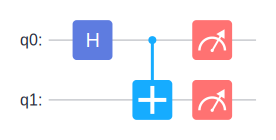

In [2]:
circ_all = Circuit()             # 初始化量子线路
circ_all += H.on(0)              # H门作用在第0位量子比特
circ_all += X.on(1, 0)           # X门作用在第1位量子比特且受第0位量子比特控制
circ_all += Measure('q0').on(0)  # 在0号量子比特作用一个测量，并将该测量命名为'q0'
circ_all += Measure('q1').on(1)  # 在1号量子比特作用一个测量，并将该测量命名为'q1'
circ_all.svg()                   # 绘制SVG格式的量子线路图片

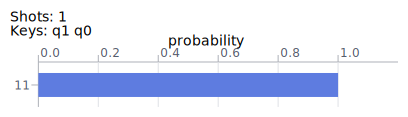

In [3]:
sim = Simulator('mqvector', 2)        # 声明一个2比特的mqvector模拟器
sim.apply_circuit(circ_all).svg()     # 在模拟器上运行量子线路

可以看到我们得到的测量结果是'11'（由于测量具有随机性，此处的结果在执行时也有可能时'00'），测量后的量子态塌缩为：

In [4]:
print(sim.get_qs(True))

1¦11⟩


量子态塌缩成了$1|11⟩$，与理论值相符。

如果我们多测量几次，可以发现测量结果也会为'00' （请执行多次观察不同的结果）：

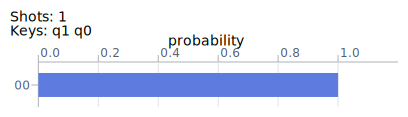

In [5]:
sim.reset()                         #复位模拟器
sim.apply_circuit(circ_all).svg()   # 在模拟器上运行量子线路

打印出此时量子态，可以看到它坍缩成了相应的$|00⟩$：

In [6]:
print(sim.get_qs(True))

1¦00⟩


我们观察到，测量结果时而为'00'时而为'11'，符合理论预期，但是没有办法观察出现00和11的概率是否相同，我们希望可以多次测量，统计出不同结果出现的频率，以此观察结果是否满足预期的概率分布。为此我们使用量子线路采样(Sampling)功能：

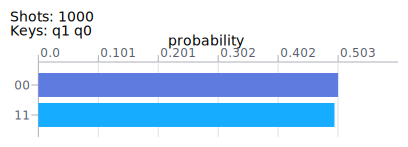

In [7]:
sim.reset()
result = sim.sampling(circ_all, shots=1000)  # 对上面定义的线路采样1000次
result.svg()

我们可以看到，采样1000中，'00'出现了503次，'11'出现了497次（由于测量具有随机性，每次运行结果会略有不同），采样结果符合概率分布，细微的误差是由模拟器噪声导致。仔细阅读的同学可以发现，在[量子模拟器教程](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/beginner/quantum_simulator.html)中我们已经展示过该线路的采样结果，但并未解释结果如是分布的原因，在本教程中学习了计算基测量后，相信同学们对该结果分布的认识更加深刻。

#### MindSpore Quantum实现测量系统中单个比特

同样地，在使用代码演示之前，我们先简单计算出理论值。

在0号量子比特上使用计算基测量$|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$：

$$
\begin{align*}
p(0)=|a|^2+|b|^2=(\frac{\sqrt{2}}{{2}})^2=\frac{1}{2}\\
p(1)=|c|^2+|d|^2=(\frac{\sqrt{2}}{{2}})^2=\frac{1}{2}\\
\end{align*}
$$

可以看到，测量结果有两种可能：0和1，概率均是$\frac{1}{2}$。测量后的状态分别为：

$$
\begin{align*}
\frac{a}{\sqrt{|a|^2+|b|^2}}|00⟩+\frac{b}{\sqrt{|a|^2+|b|^2}}|01⟩=|00⟩\\
\frac{c}{\sqrt{|c|^2+|d|^2}}|10⟩+\frac{d}{\sqrt{|c|^2+|d|^2}}|11⟩=|11⟩\\
\end{align*}
$$

我们开始搭建制备$|\psi⟩=\frac{\sqrt{2}(|00⟩+|11⟩)}{2}$并在0号量子比特上做测量的量子线路：

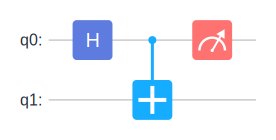

In [8]:
circ_partial = Circuit()             # 初始化量子线路
circ_partial += H.on(0)              # H门作用在第0位量子比特
circ_partial += X.on(1, 0)           # X门作用在第1位量子比特且受第0位量子比特控制
circ_partial += Measure('q0').on(0)  # 在0号量子比特作用一个测量，并将该测量命名为'q0'
circ_partial.svg()                   # 绘制SVG格式的量子线路图片

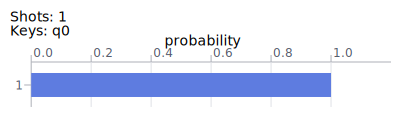

In [9]:
sim.reset()                            # 复位模拟器
sim.apply_circuit(circ_partial).svg()  # 在模拟器上运行量子线路

可以看到我们得到的测量结果是'1'（由于测量具有随机性，执行时有可能测量结果为'0'），测量后的量子态塌缩为：

In [10]:
print(sim.get_qs(True))

1¦11⟩


量子态塌缩成了$1|11⟩$，与理论值相符。

同样地，如果我们多测量几次，可以发现测量结果也会为'0'，此处不再演示。我们直接对该量子线路采样1000次观察结果：

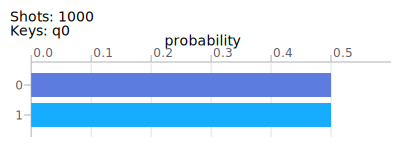

In [11]:
sim.reset()
result = sim.sampling(circ_partial, shots=1000)  # 对上面定义的线路采样1000次
result.svg()

我们可以看到，采样1000中，'0'出现了500次，'1'出现了500次。采样结果符合概率分布，细微的误差是由模拟器噪声导致。

以上我们完成了量子计算基测量的学习，接下来我们进入到另一种测量操作的学习：投影测量。

## 投影测量

投影测量(projective measuremen)由被观察系统状态空间上一个可观测量（observable）Hermite算子$M$来描述($M=M^{\dagger}$)，该可观测量具有谱分解：

$$
M=\Sigma_{m}mP_m
$$

这里的$P_m$是在$m$的特征值$m$对应特征空间上的投影，测量的可能结果对应于测量算子的特征值$m$。测量状态$|\psi⟩$时，得到结果$m$的概率为

$$
p(m)=⟨\psi|P_m|\psi⟩
$$

测量后量子系统的状态立即为：

$$
\frac{P_m|\psi⟩}{\sqrt{p(m)}}
$$

直观解释是，我们对状态$|\psi⟩$使用$M$投影测量，是把$|\psi⟩$往$M$的特征空间上投影，有$p_m$的概率投影到空间$V_{m}$中，此时测量结果为该空间对应的特征值$m$。

投影测量一个重要的特征就是很容易计算投影测量的期望值$E(M)$。

$$
\begin{align*}
    E(M) &=\Sigma_i \lambda_i p_i\\
         &=\Sigma_i \lambda_i⟨\psi|P_i|\psi⟩\\
         &=⟨\psi|(\Sigma_i\lambda_i P_i)|\psi⟩\\
         &=⟨\psi|M|\psi⟩
\end{align*}
$$

投影测量可以视为一般测量的特殊情况，当测量算子除了满足完备性关系$\Sigma_mM_m^\dagger M_m=I$时，还满足$M_m$是正交投影算子的条件，即$M_m$是Hermite的，并且

$$
M_mM_{m'}=\delta_{mm'}M_m
$$

有了这些附加限制，一般测量退化成投影测量。

## Pauli测量

最后我们学习Pauli测量，Pauli测量是投影测量中把可观测量$M$选取为泡利算子。以Pauli-Z测量为例，我们考虑Z算子：

$$
Z=
\left(
    \begin{array}{l}
    1&0\\
    0&-1
    \end{array}
\right)
$$

可以看出，Z满足$Z=Z^\dagger$，即Z是Hermite的。Z有两个特征值+1，-1，对应的特征向量分别为：|0⟩和|1⟩。因此Z的谱分解形式为：

$$
Z=\left(
    \begin{array}{l}
    1&0\\
    0&-1
    \end{array}
\right)=1\times|0⟩⟨0|+(-1)\times|1⟩⟨1|
$$

使用Z做投影测量，如果测量结果为+1，我们可得出该量子比特的状态被投影到Z算子的+1特征子空间$V_{+1}$中，表明被测量态被投影成了|0⟩，相似地，如果测量结果为-1，可得出该量子比特被投影到-1特征子空间$V_{-1}$中，表明被测量态被投影成了|1⟩，这即为Pauli-Z测量。

MindSpore Quantum中为我们提供了基于给定可观测量H计算投影测量期望值的功能：

[get_expectation(hamiltonian)](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation) 可以计算出模拟器当前量子态关于某个观察量的期望值：$E=⟨\psi|H|\psi⟩$。**该操作不会改变量子态**。

例如，我们希望对处于$\frac{\sqrt{2}}{2}|00⟩+\frac{\sqrt{2}}{2}|11⟩$态的系统上的q1比特上作用一个Pauli-Z测量，首先我们将模拟器置位：

In [12]:
sim = Simulator('mqvector', 2)                        # 声明一个2比特的mqvector模拟器
sim.set_qs(np.array([2**0.5 / 2, 0, 0, 2**0.5 / 2]))  # 设置模拟器状态
print(sim.get_qs())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


然后我们构造出在q1上做Pauli-Z测量对应的哈密顿量hams:

In [13]:
from mindquantum.core.operators import Hamiltonian    # 引入哈密顿量定义模块
from mindquantum.core.operators import QubitOperator  # 引入稀疏算子定义模块

hams = Hamiltonian(QubitOperator('Z1'))               # 构建在q1上作Pauli-Z测量的哈密顿量

为了深刻认识学习Pauli-Z测量操作，我们先手动计算出模拟器当前量子态在q1上做Pauli-Z测量的期望值，并推算出测量结果为+1，-1的概率：

$$
\begin{align*}
E&=⟨\psi|H|\psi⟩\\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
(Z \otimes I) \times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0\\
    0&-1\\
    \end{array}
\right) \otimes
\left(
\begin{array}{l}
    1&0\\
    0&1\\
\end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0&0&0\\
    0&1&0&0\\
    0&0&-1&0\\
    0&0&0&-1
    \end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
0\\
&=1\times p(1)+(-1)\times p(-1)\\
&=1\times p(1)+(-1)\times (1-p(1))\\
&=p(1)-1+p(-1)\\
\Longrightarrow&p(1)=p(-1)=0.5
\end{align*}
$$

这说明测量的理论期望值为0，测量出+1，-1的概率均为50%，我们使用MindSpore Quantum提供的 [get_expectation()](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation) 来验证结果：

In [14]:
sim.get_expectation(hams)  # 计算出模拟器当前量子态关于hams的期望值

0j

可以看到，手动计算和使用 [get_expectation(hamiltonian)](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation) 计算出的结果相同，符合预期。

我们还可以对处于$\frac{\sqrt{2}}{2}|00⟩+\frac{\sqrt{2}}{2}|11⟩$态的系统上的q0,q1比特上均作用Pauli-Z测量。类似地构造出在q0,q1上做Pauli-Z测量对应的哈密顿量hams2:

In [15]:
hams2 = Hamiltonian(QubitOperator('Z0') + QubitOperator('Z1'))   # 构建在q0,q1上作Pauli-Z测量的哈密顿量

我们同样可以手动计算出模拟器当前量子态在q0、q1上做Pauli-Z测量的期望值：

$$
\begin{align*}
E&=⟨\psi|H|\psi⟩\\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
(Z \otimes I) \times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right)
+
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
(I \otimes Z) \times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0\\
    0&-1\\
    \end{array}
\right) \otimes
\left(
\begin{array}{l}
    1&0\\
    0&1\\
\end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right)
+
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0\\
    0&1\\
    \end{array}
\right) \otimes
\left(
\begin{array}{l}
    1&0\\
    0&-1\\
\end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0&0&0\\
    0&1&0&0\\
    0&0&-1&0\\
    0&0&0&-1
    \end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right)
+
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}& 0& 0& \frac{\sqrt{2}}{2}
    \end{array}
\right) \times
\left(
    \begin{array}{l}
    1&0&0&0\\
    0&-1&0&0\\
    0&0&1&0\\
    0&0&0&-1
    \end{array}
\right)
\times
\left(
    \begin{array}{l}
    \frac{\sqrt{2}}{2}\\
    0\\
    0\\
    \frac{\sqrt{2}}{2}
    \end{array}
\right) \\&=
0+0 \\
&=0
\end{align*}
$$

In [16]:
sim.set_qs(np.array([2**0.5 / 2, 0, 0, 2**0.5 / 2]))  # 设置模拟器状态
sim.get_expectation(hams2)                            # 计算出模拟器当前量子态关于hams2的期望值

0j

该操作不会改变量子态，我们查看当前量子态：

In [17]:
sim.get_qs()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

可以发现，量子态依然是最初设定的$\frac{\sqrt{2}}{2}|00⟩+\frac{\sqrt{2}}{2}|11⟩$

我们学习认识了量子计算中重要的一个操作——测量，还使用MindSpore Quantum测量量子线路验证我们的理论结果，并使用不同可视化工具展示出测量结果。

想学习MindSpore Quantum中量子线路的高阶操作，构建并训练量子经典混合神经网络，请查看 [get_expectation_with_grad()](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation_with_grad) 和 [apply_hamiltonian()](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.11/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.apply_hamiltonian) 的文档。

In [18]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')